In [1]:
from data_import import import_from_file
from ahrs.filters import EKF
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data = import_from_file('test_data_1.csv')

In [3]:
t = data[:,0]
acc = data[:,1:4]
gryo = data[:,4:7] / 360 * 2 * np.pi
mag = data[:,7:10]

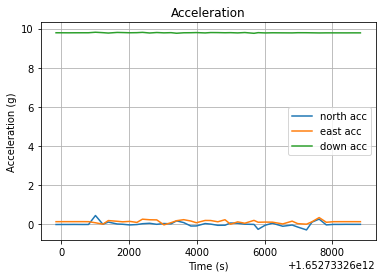

In [4]:
plt.plot(t, acc[:,0], label='north acc')
plt.plot(t, acc[:,1], label='east acc')
plt.plot(t, acc[:,2], label='down acc')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title("Acceleration")
plt.grid()

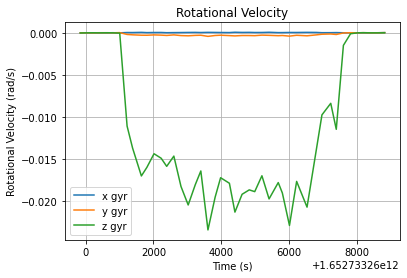

In [5]:
plt.plot(t, gryo[:,0], label='x gyr')
plt.plot(t, gryo[:,1], label='y gyr')
plt.plot(t, gryo[:,2], label='z gyr')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Rotational Velocity (rad/s)')
plt.title("Rotational Velocity")
plt.grid()

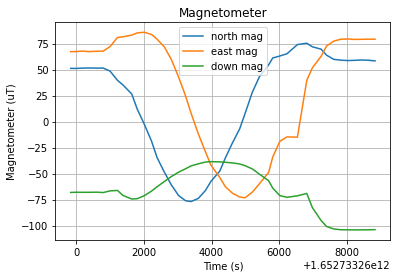

In [6]:
plt.plot(t, mag[:,0], label='north mag')
plt.plot(t, mag[:,1], label='east mag')
plt.plot(t, mag[:,2], label='down mag')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Magnetometer (uT)')
plt.title("Magnetometer")
plt.grid()

In [7]:
initial_pose = R.from_euler("XYZ", [0, 0, 0]).as_quat()
ekf = EKF(frequency = 1, q0 = initial_pose, frame= 'NED')
num_samples = len(t)
Q = np.zeros((num_samples, 4))
Q[0] = initial_pose

for s in range(1, num_samples):
    Q[s] = ekf.update(Q[s-1], gryo[s], acc[0], mag[0])

In [12]:
pose = np.zeros((num_samples, 3))
for i in range(num_samples):
    pose[i] = R.from_quat(Q[i]).as_euler('zyx')

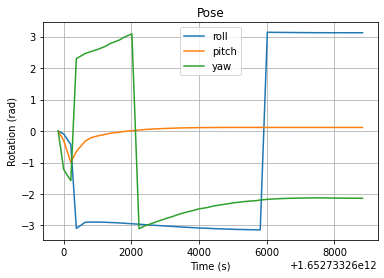

In [13]:
plt.plot(t, pose[:,0], label='roll')
plt.plot(t, pose[:,1], label='pitch')
plt.plot(t, pose[:,2], label='yaw')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Rotation (rad)')
plt.title("Pose")
plt.grid()